<a href="https://colab.research.google.com/github/kaindoh/Hypothyroid/blob/master/Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. The aim for this analysis is to identify whether or not the patient has hypothyroidism.

# Problem Statement


Part 1: Decision trees:

- For this section, i will build model using.  Random forests, Ada boosted trees, and gradient boosted trees.

- Optimize my parameters to suit my model

Part 2: SVM:

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. 

- Visualize your best kernel

# Metrics of success


1.   Accuracy Score
2.   F1 score
3.   Precision score
4.   Recall score





# Importing libraries and loading dataset

In [0]:
# Importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold
from sklearn.preprocessing import StandardScaler,robust_scale,minmax_scale
from imblearn.over_sampling import SMOTE
from collections import OrderedDict
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,r2_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Loading hypothyroid dataset
df = pd.read_csv("hypothyroid.csv")
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
# checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [0]:
# Getting the statistical information of the dataset
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [0]:
# Getting the data types of the columns
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
# Getting unique values for categorical columns
columns = df.columns
for i in columns:
  print(i)
  print(df[i].unique())
  print("******************")
  print("\n")

status
['hypothyroid' 'negative']
******************


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
******************


sex
['M' 'F' '?']
******************


on_thyroxine
['f' 't']
******************


query_on_thyroxine
['f' 't']
******************


on_antithyroid_medication
['f' 't']
******************


thyroid_surgery
['f' 't']
******************


query_hypothyroid
['f' 't']
******************


query_hyperthyroid
['f' 't']
******************


pregnant
['f' 't']
******************


sick
['f' 't']
******************


tumor
['f' 't']
******************


lithiu

In [0]:
# Due to the excistence of ?  we shall replace it with null values
df = df.replace("?",np.nan)
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
# Getting the column names of dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

# Data Cleaning

In [0]:
# changing the the data types of the dataset
cat =['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured','FTI_measured','TBG_measured']
for i in df.columns:
  if i in cat:
    df[i] =df[i].astype('category')
  else:
    df[i] = pd.to_numeric(df[i])
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [0]:
# Dealing with missing values
# For age and sex, i will fill with most common age and sex respectively which use of mode
df['age'] = df['age'].fillna(df['age'].mode()[0])

df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
# checking where the null values lie based on whether they were measured or not

measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit = ['TSH','T3','TT4','T4U','FTI','TBG']

for i,j in zip(measured,unit): 
  print(df.groupby(i)[j].mean())

TSH_measured
n        NaN
y    5.92318
Name: TSH, dtype: float64
T3_measured
n         NaN
y    1.939749
Name: T3, dtype: float64
TT4_measured
n       NaN
y    108.85
Name: TT4, dtype: float64
T4U_measured
n         NaN
y    0.978199
Name: T4U, dtype: float64
FTI_measured
n           NaN
y    115.397771
Name: FTI, dtype: float64
TBG_measured
n          NaN
y    31.283077
Name: TBG, dtype: float64


We discover that the null values lie when there was no specific measurement at a particular test hence we fill the null values with zero

In [0]:
# Filling the null valued that were not measured with 0
unit_df = ['TSH','T3','TT4','T4U','FTI','TBG']

for i in unit_df:
  df[i].fillna(value = 0, inplace=True)

In [0]:
# Checking whether all values are well taken care of

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

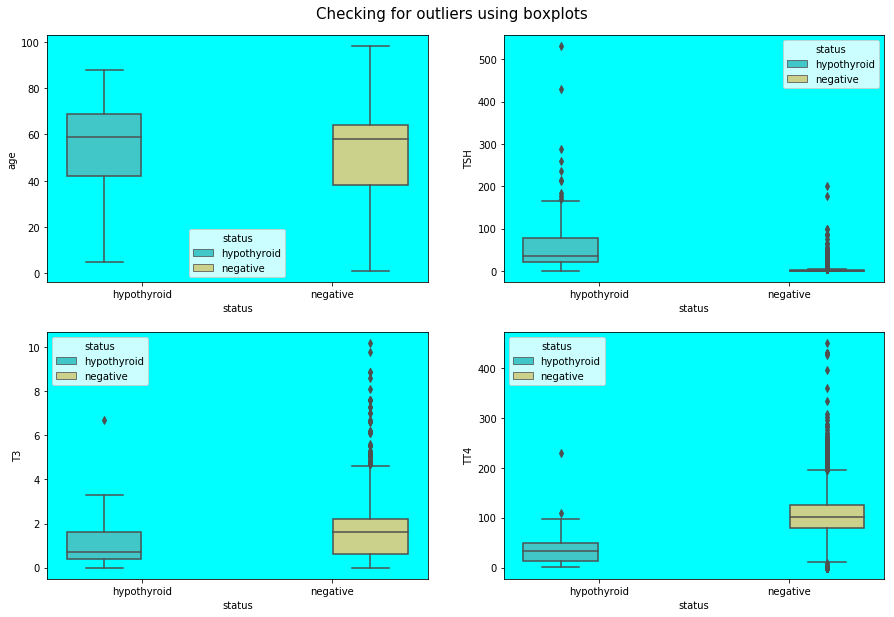

In [0]:
# Checking for outliers
numerical = ['age','TSH','T3','TT4','T4U','FTI','TBG']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92)
for ax, data, column in zip(axes.flatten(), df, numerical):
  sns.boxplot(df.status, df[column], ax = ax, hue = df.status, palette = 'rainbow')
  ax.set_facecolor('cyan') 

I dint remove outliers because i want to get the reason as to why they exist

In [0]:
# Checking for duplicates
df.duplicated().any()

True

In [0]:
# Dropping the duplicates

df.drop_duplicates(inplace=True)


# Checking that the duplicates have actualy been dropped

df.duplicated().any()

False

# Explorative Data Analysis

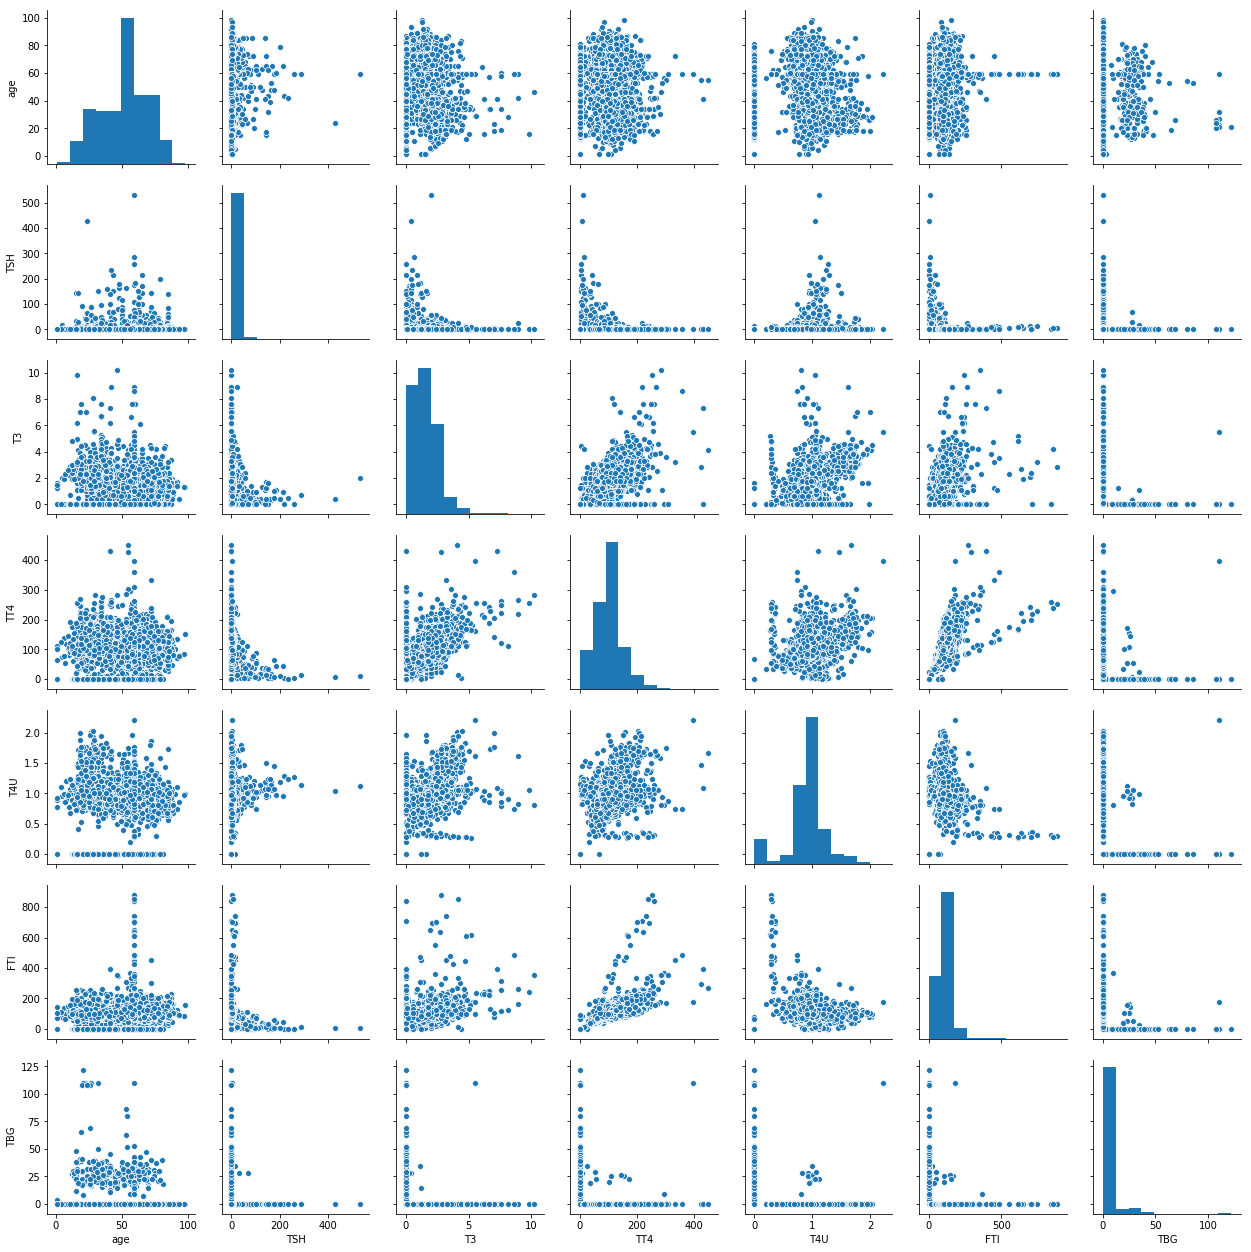

In [0]:
# Getting the relationship between the variables

sns.pairplot(df)

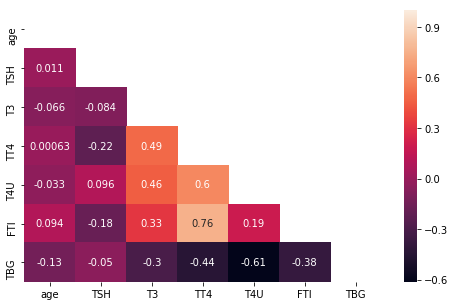

In [0]:
# Getting the relationship between variables in numeric values using a heatmap


# Correlation heatmap of the numerical variables 
corr  =df.corr()

plt.figure(figsize = (8,5))
heatmap = np.zeros_like(df.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(df.corr(), annot=True, mask=heatmap)
plt.show()


It can be seen that there is high correlation between T4U and TBG

Also there is very high correlation between TBG and T3


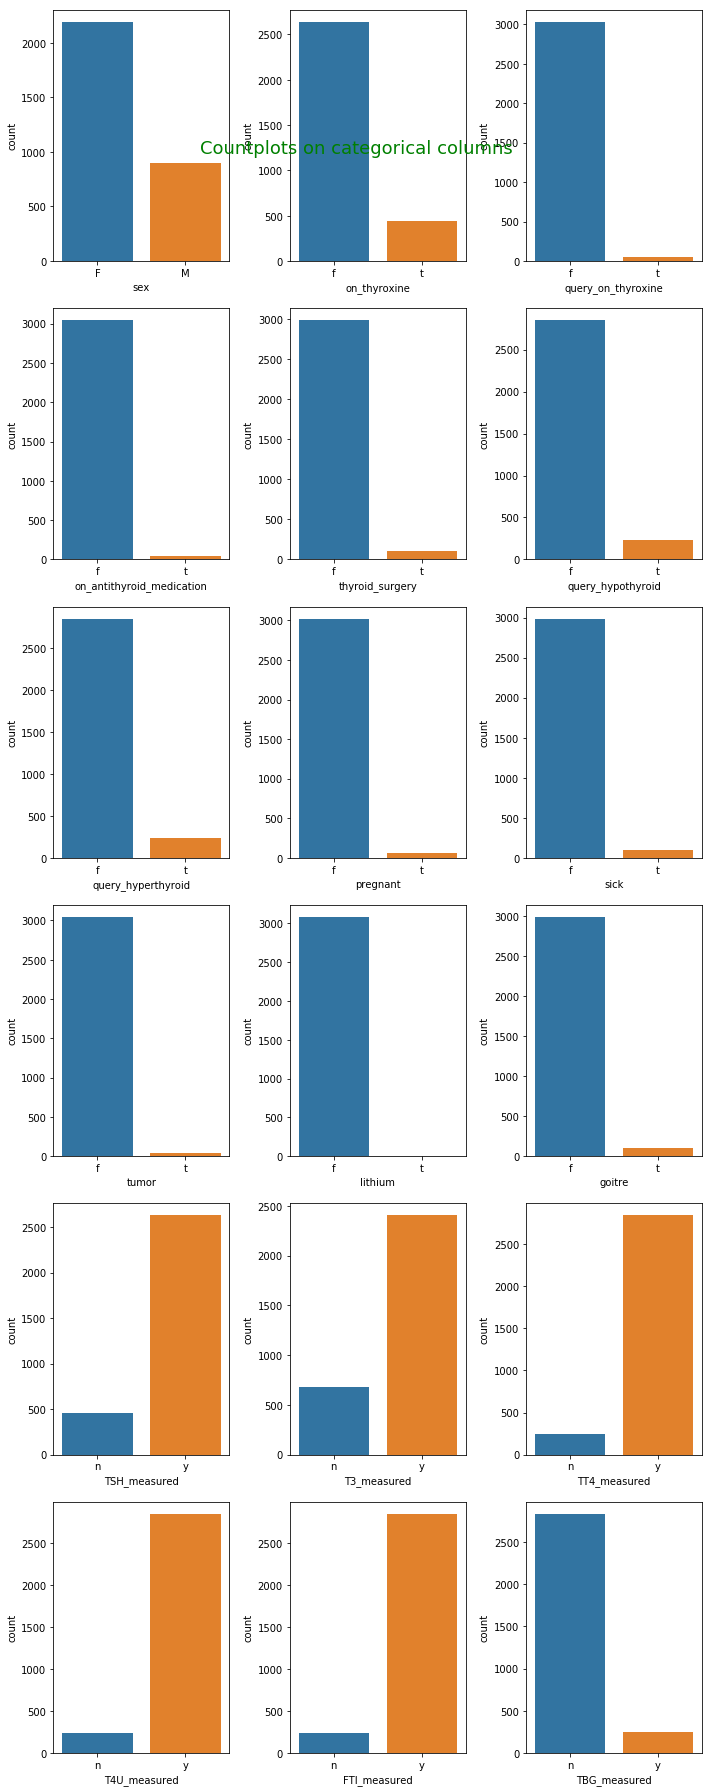

In [0]:
# Visualizing categorical columns

cat=['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10,25))
plt.suptitle('Countplots on categorical columns', fontsize = 18, y = 0.92, color = 'green')
for ax, data, column in zip(axes.flatten(), df, cat):
    sns.countplot(df[column], ax=ax)
    
plt.tight_layout()
plt.show()

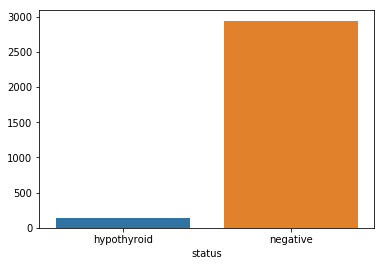

In [0]:
# Visualizing the target variable
target  = df.groupby('status')['status'].count()
sns.barplot(target.index,target.values)
plt.show()

This shows that the data is imbalanced


# Modelling

## Part 1: Decision trees:

In [0]:
# Splitting the dataset into target and feature set
# Making categorical data into dummies

x = df.drop('status',axis=1)
X = pd.get_dummies(x)

y = df['status']
y =pd.get_dummies(y,drop_first=True)

In [0]:
# splitting the dataset to train set and test set

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [0]:
# Implementing Standard Scaler to nomalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
# implementing random forest
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9918962722852512
precision_score 0.9932773109243698
recall_score 0.9983108108108109
f1_score 0.995787700084246


This is quite high there is chances of overfitting

In [0]:
# Tuning to get the best parameters of randomforest
param ={
    "criterion":['gini','entropy'],
    "min_samples_split" : np.arange(1,100,1),
    "n_estimators":np.arange(1,100,1),
    "max_depth":np.arange(1,10,1),
    "n_jobs":np.arange(1,100,1)
}
kfold = KFold(n_splits=10,random_state=0)
rsc = RandomizedSearchCV(rf,param,cv=kfold,verbose=0,random_state=0)
rsc.fit(x_train,y_train)
print(rsc.best_params_)
print(rsc.best_score_)

{'n_jobs': 83, 'n_estimators': 93, 'min_samples_split': 87, 'max_depth': 8, 'criterion': 'gini'}
0.986223662884927


In [0]:
# now we want to get the variables with the highest importance

clf = RandomForestClassifier(max_depth= 8,n_jobs= 83, min_samples_split= 87, criterion= 'gini',n_estimators= 49)
clf.fit(x_train,y_train)
importance = clf.feature_importances_
names = X.columns
dict1 = {}
for i,j in zip(names,importance):
  dict1[i] = j
OrderedDict(sorted(dict1.items(),key =lambda x:x[1],reverse=True))


OrderedDict([('TSH', 0.29451600094465596),
             ('FTI', 0.2849026566307002),
             ('TT4', 0.22344794663932277),
             ('T4U', 0.042727840927612774),
             ('T3', 0.04145241903278771),
             ('TT4_measured_n', 0.02138610122372451),
             ('TBG', 0.017066825561342047),
             ('TBG_measured_y', 0.013032603462965512),
             ('FTI_measured_n', 0.009423689651475834),
             ('T4U_measured_y', 0.008647299112794753),
             ('TSH_measured_n', 0.007631089474488575),
             ('T3_measured_n', 0.005572047374472942),
             ('TBG_measured_n', 0.0042729232712397465),
             ('age', 0.004191847040812084),
             ('TSH_measured_y', 0.004087003597808792),
             ('on_thyroxine_f', 0.0026949433724572295),
             ('query_hypothyroid_t', 0.002373773695626011),
             ('thyroid_surgery_t', 0.001542985917550952),
             ('on_antithyroid_medication_f', 0.0015222575644925078),
             ('s

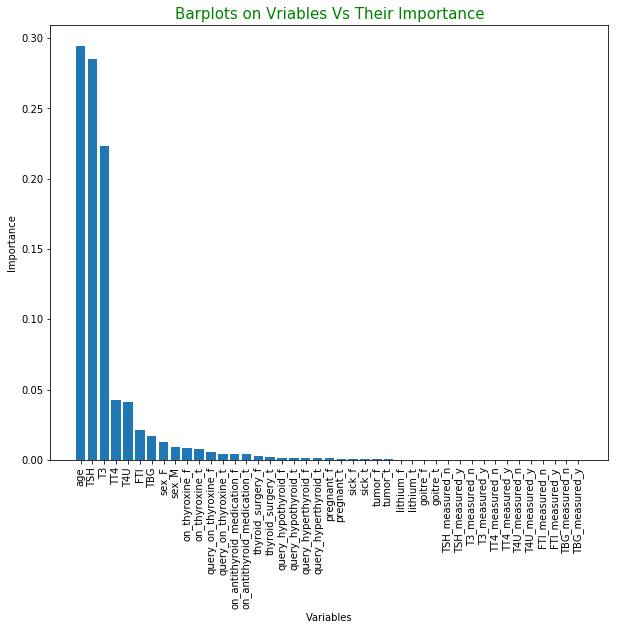

In [0]:
# Visualizing the columns with highest importance
df1 = pd.DataFrame({"variables":X.columns,"Importance":importance})
x_values = list(range(len(importance)))
plt.figure(figsize=(10,8))
plt.bar(x_values, df1['Importance'].sort_values(ascending=False))
plt.xticks(x_values, df1.variables, rotation='vertical')
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.title("Barplots on Vriables Vs Their Importance",fontsize=15,color="green")
plt.show()

This shows that age TSH T3 TT4 are the highest contributers

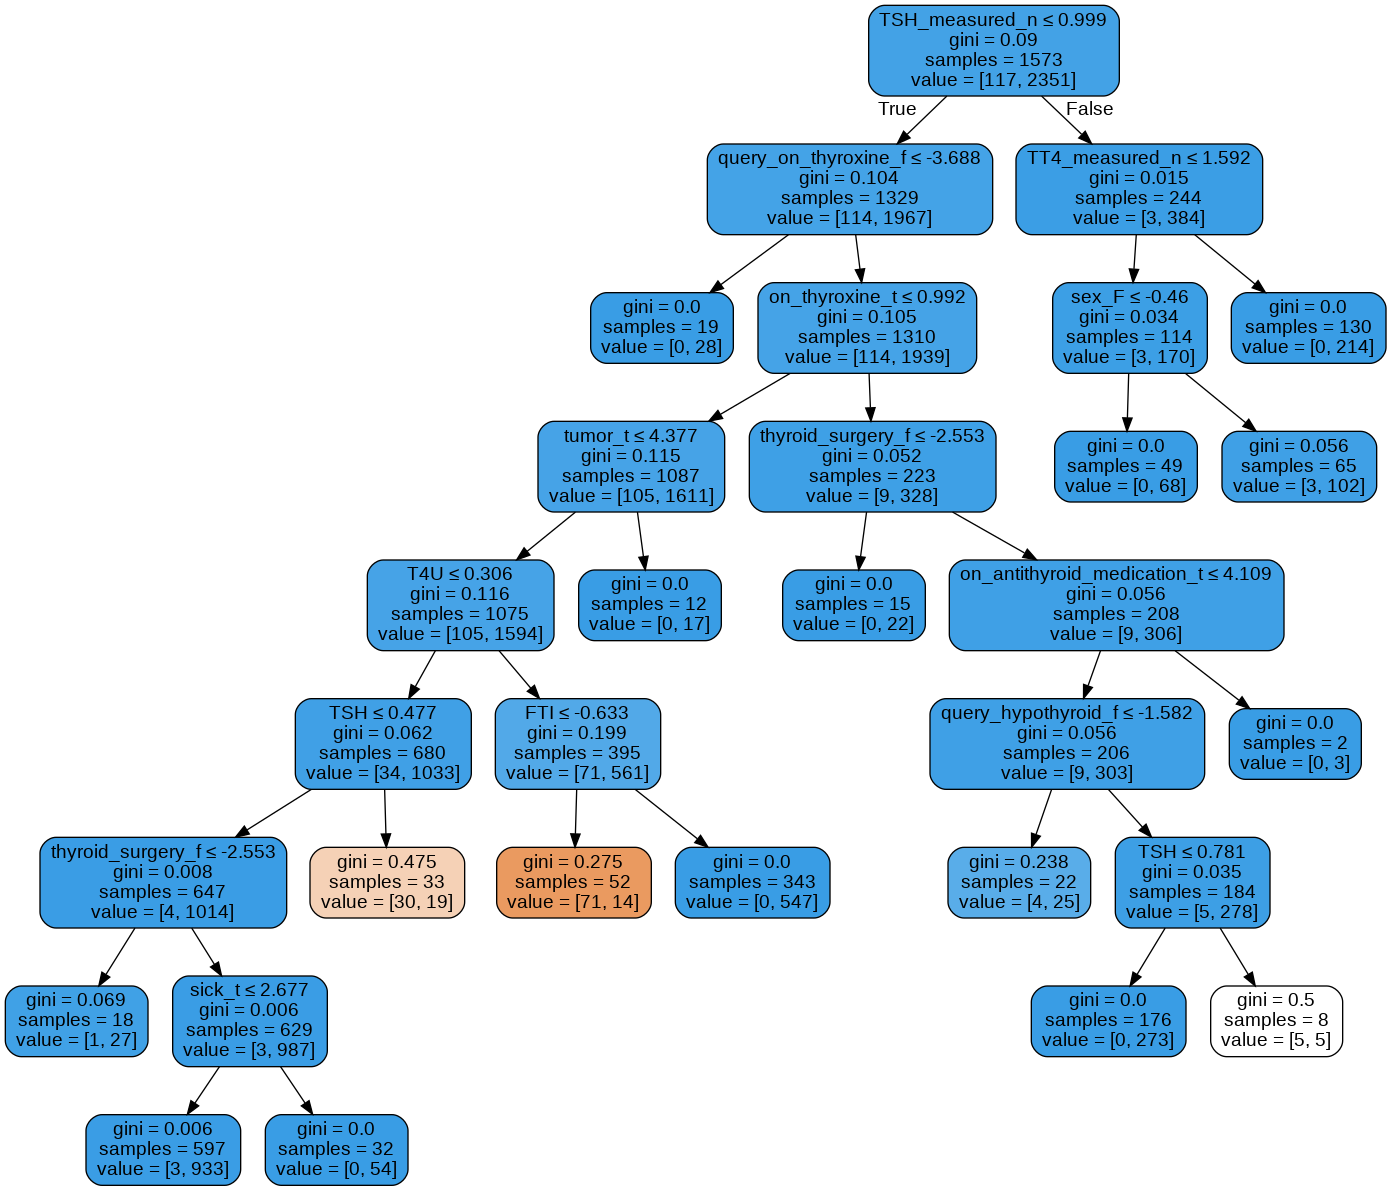

In [0]:
# Now We can see the tree and for visualization purposes we will use 50 Trees
dot_data = StringIO()
# pick a specific tree from the forest
tree = clf.estimators_[30]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hyperthyroid.png')
Image(graph.create_png())

## Adaboosting

In [0]:
# Now using the best parameters lets implement Adaboosting with randomForest

rf = AdaBoostClassifier(RandomForestClassifier(max_depth= 8,n_jobs= 83, min_samples_split= 87, criterion= 'gini'),n_estimators= 93)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.993517017828201
precision_score 0.9932885906040269
recall_score 1.0
f1_score 0.9966329966329966


It has the highest metrics of success though it is computational expensive

## GradientBoosting

In [0]:
# Now we are implementing Gradient Boosting
gf = GradientBoostingClassifier()
gf.fit(x_train,y_train)
y_pred = gf.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.993517017828201
precision_score 0.9966216216216216
recall_score 0.9966216216216216
f1_score 0.9966216216216216


Gradient boosting also have very high scores compared to RandomForest

## Part 2: SVM:

In [0]:
# Splitting the dataset into target and feature set
# Making categorical data into dummies

x = df.drop('status',axis=1)
X = pd.get_dummies(x)

y = df['status']
y =pd.get_dummies(y,drop_first=True)

In [0]:
# Making the data balanced using SMOTE technique

sm = SMOTE()
X, y = sm.fit_sample(X, y)

In [0]:
# splitting the dataset to train set and test set

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [0]:
# Implementing Standard Scaler to nomalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
# implementing support vector machines with a linear kernel
svcl = SVC(kernel='linear')
svcl.fit(x_train,y_train)
y_pred = svcl.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9796264855687606
precision_score 0.9844827586206897
recall_score 0.9744027303754266
f1_score 0.9794168096054888


In [0]:
# implementing support vector machines with a rbf kernel
svcr = SVC(kernel='rbf')
svcr.fit(x_train,y_train)
y_pred = svcr.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9804753820033956
precision_score 0.9779286926994907
recall_score 0.9829351535836177
f1_score 0.9804255319148937


In [0]:
# implementing support vector machines with a polynomial kernel
svcp = SVC(kernel='poly')
svcp.fit(x_train,y_train)
y_pred = svcp.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9219015280135824
precision_score 0.9881422924901185
recall_score 0.8532423208191127
f1_score 0.9157509157509158


In [0]:
# implementing support vector machines with a sigmoid kernel
svcs = SVC(kernel='sigmoid')
svcs.fit(x_train,y_train)
y_pred = svcs.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9015280135823429
precision_score 0.8916666666666667
recall_score 0.9129692832764505
f1_score 0.9021922428330523


It is evident that rbf has the highest metrics of success compared to other kernels

In [0]:
# Having in mind that rbf kernel is the best parameter lets look at how to optimize other parameters like c and gamma
param ={
    "C":np.arange(1,100,1),
    "gamma" : np.arange(2**-5,2**5,0.01)
}
kfold = KFold(n_splits=10,random_state=0)
rsc = RandomizedSearchCV(svcr,param_distributions=param,cv=kfold,verbose=0,random_state=0)
rsc.fit(x_train,y_train)
print(rsc.best_params_)
print(rsc.best_score_)

{'gamma': 4.251250000000001, 'C': 96}
0.9309978768577495


In [0]:
# Implementing the most optimal parameters

svcr = SVC(kernel='rbf',gamma= 4.251250000000001, C= 96)
svcr.fit(x_train,y_train)
y_pred = svcr.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))


accuracy_score 0.9363327674023769
precision_score 0.8877086494688923
recall_score 0.9982935153583617
f1_score 0.9397590361445783


With very optimal parameters we get recall of 99.8%

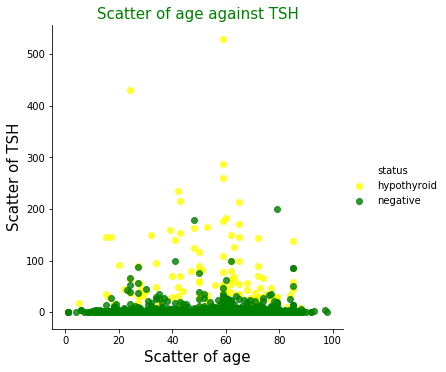

In [0]:
# Using only two parameters for visualization purposes
# Visualizing the relationship between age and TSH
sns.lmplot(x='age',y='TSH',hue='status',data=df,palette=dict(hypothyroid='yellow',negative='green'),fit_reg=False)
plt.title("Scatter of age against TSH",color="green",fontsize=15)
plt.xlabel("Scatter of age" ,fontsize=15)
plt.ylabel("Scatter of TSH" ,fontsize=15)
plt.show()

## Smaller dataset for purpose of visualiation of svm

In [0]:
# splitting the dataset using only two variables in my feature set
Z = df[['age','TSH']]

y = df['status']
y =pd.get_dummies(y,drop_first=True)

In [0]:
# Making the data balanced using SMOTE technique

sm = SMOTE()
Z, y = sm.fit_sample(Z, y)

In [0]:
# splitting the dataset to train set and test set

x_train,x_test,y_train,y_test = train_test_split(Z,y,random_state=0,test_size=0.2)

In [0]:
# Implementing Standard Scaler to nomalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
svcr2 = SVC(kernel='rbf',gamma= 4.251250000000001, C= 96)
svcr2.fit(x_train,y_train)
y_pred = svcr2.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9617996604414262
precision_score 0.9770723104056437
recall_score 0.9453924914675768
f1_score 0.9609713790112749


In [0]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = svcr2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hyperthyroid Classification with RBF SVC')
X = df[['age', 'TSH']].iloc[:150, :].values
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svcr2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=type_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('TSH')
ax.set_xlabel('Age')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

# Challenging the solution

I am going to use xgboost insead of svm and randomforest to see whether there is change in perfomance

In [0]:
# Splitting the dataset into target and feature set
# Making categorical data into dummies

x = df.drop('status',axis=1)
X = pd.get_dummies(x)

y = df['status']
y =pd.get_dummies(y,drop_first=True)


sm = SMOTE()
X, y = sm.fit_sample(X, y)

# splitting the dataset to train set and test set

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
# Implementing Standard Scaler to nomalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9872665534804754
precision_score 0.9897084048027445
recall_score 0.984641638225256
f1_score 0.9871685201026518


XGBoost has higher perfomance compared to other models